In [33]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diamonds/diamonds.csv


GOAL: Find Determinants of Price.

In [34]:
diamonds = pd.read_csv('/kaggle/input/diamonds/diamonds.csv')

In [35]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [36]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [37]:
diamonds_n = diamonds.select_dtypes(exclude='object')

Text(0.5, 1.0, 'Correlations')

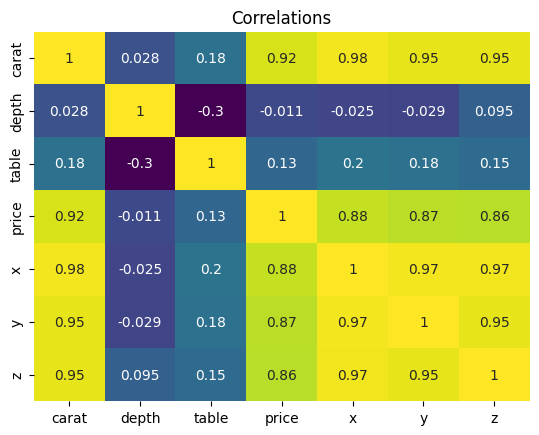

In [38]:
sns.heatmap(diamonds_n.corr(),cmap='viridis',cbar=False,annot=True)
plt.title('Correlations')


carat is a measure of diamond weight. One carat is equivalent to 0.2 grams.

clarity refers to how clear a diamond is. Diamonds often contain imperfections like cracks or mineral deposits. The fewer and less noticeable a diamond’s imperfections, the better its clarity. clarity contains 8 ordered levels, from “I1” (the worst) to “IF” (the best).

color refers to the color of the diamond. Colorless diamonds are considered better than diamonds with a yellow tint. diamonds contains diamonds of 7 different colors, represented by different letters. “D” - “F” diamonds are considered colorless, while “G” - “J” diamonds have a very faint color.

cut refers to how a rough diamond is shaped into a finished diamond. Better cuts create more symmetrical and luminous diamonds. cut has 5 ordered levels: “Fair,” “Good,” “Very Good,” “Premium,” “Ideal.”

x, y, z, depth, and table are various measures of a diamond’s size, in millimeters.

Strong Correlations:
Carat - price,x,y,z
Price - x,y,z


This means that heavier diamonds are pricier and larger in size. 
Pricier diamonds are larger.

Text(0.5, 1.0, 'Price and Carat')

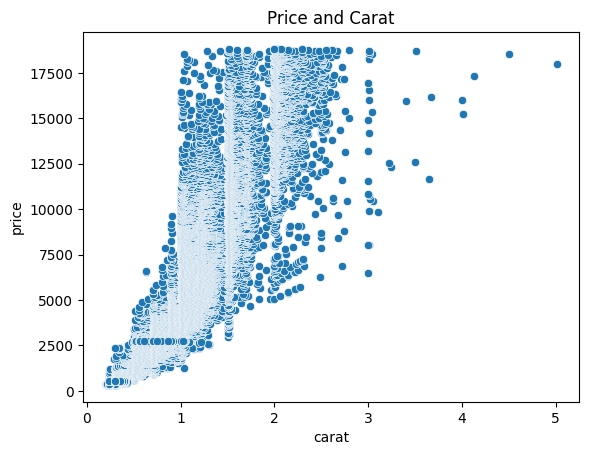

In [39]:
sns.scatterplot(data=diamonds,x=diamonds.carat,y=diamonds.price)
plt.title('Price and Carat')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Ideal'),
  Text(1, 0, 'Premium'),
  Text(2, 0, 'Very Good'),
  Text(3, 0, 'Good'),
  Text(4, 0, 'Fair')])

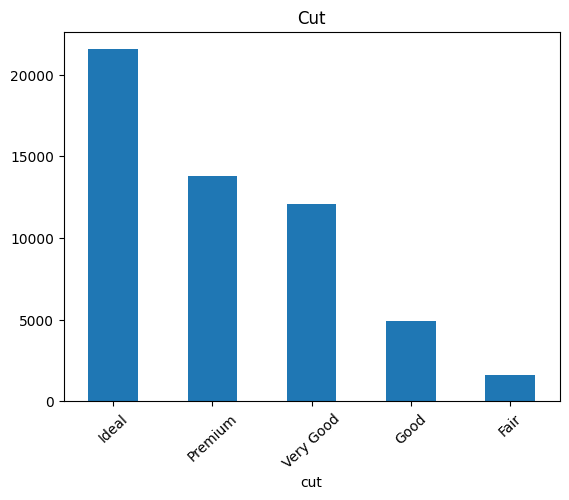

In [40]:
diamonds.cut.value_counts().plot.bar()
plt.title('Cut')
plt.xticks(rotation=43)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'G'),
  Text(1, 0, 'E'),
  Text(2, 0, 'F'),
  Text(3, 0, 'H'),
  Text(4, 0, 'D'),
  Text(5, 0, 'I'),
  Text(6, 0, 'J')])

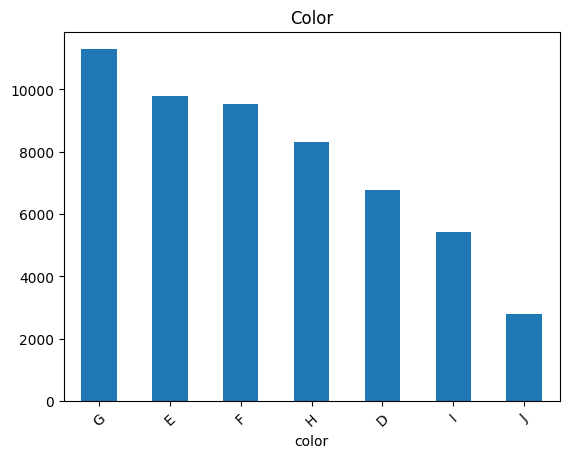

In [41]:
diamonds.color.value_counts().plot.bar()
plt.title('Color')
plt.xticks(rotation=43)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'SI1'),
  Text(1, 0, 'VS2'),
  Text(2, 0, 'SI2'),
  Text(3, 0, 'VS1'),
  Text(4, 0, 'VVS2'),
  Text(5, 0, 'VVS1'),
  Text(6, 0, 'IF'),
  Text(7, 0, 'I1')])

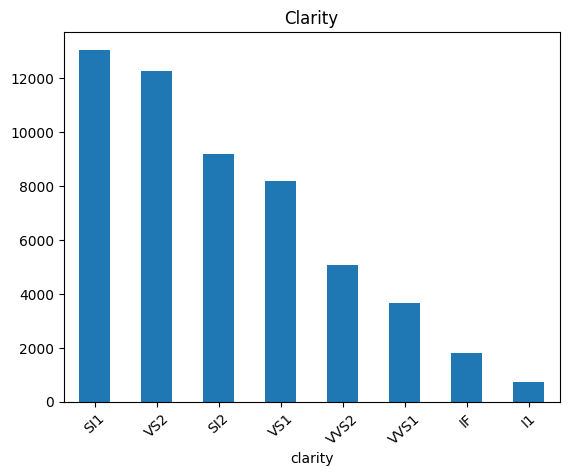

In [42]:
diamonds.clarity.value_counts().plot.bar()
plt.title('Clarity')
plt.xticks(rotation=43)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Fair'),
  Text(1, 0, 'Good'),
  Text(2, 0, 'Ideal'),
  Text(3, 0, 'Premium'),
  Text(4, 0, 'Very Good')])

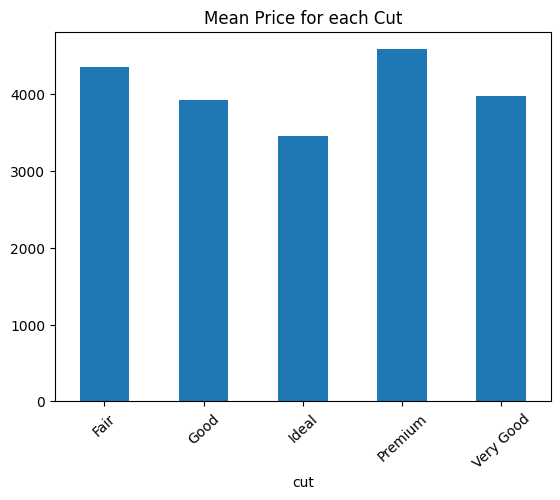

In [43]:
diamonds.groupby('cut')['price'].agg('mean').plot.bar()
plt.title('Mean Price for each Cut')
plt.xticks(rotation=43)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Fair'),
  Text(1, 0, 'Good'),
  Text(2, 0, 'Ideal'),
  Text(3, 0, 'Premium'),
  Text(4, 0, 'Very Good')])

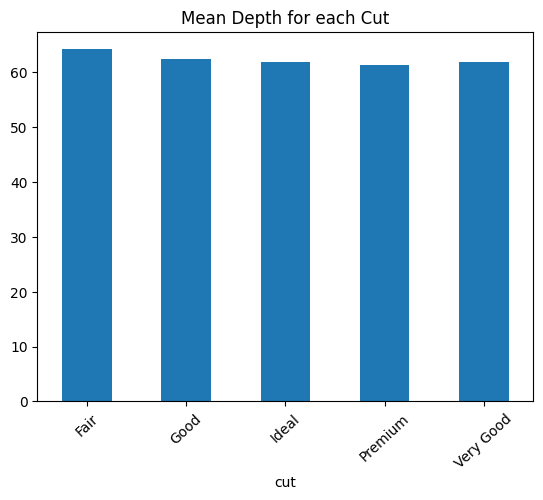

In [44]:
diamonds.groupby('cut')['depth'].agg('mean').plot.bar()
plt.title('Mean Depth for each Cut')
plt.xticks(rotation=43)

In [45]:
diamonds.groupby('cut')['color'].value_counts()

cut        color
Fair       G         314
           F         312
           H         303
           E         224
           I         175
           D         163
           J         119
Good       E         933
           F         909
           G         871
           H         702
           D         662
           I         522
           J         307
Ideal      G        4884
           E        3903
           F        3826
           H        3115
           D        2834
           I        2093
           J         896
Premium    G        2924
           H        2360
           E        2337
           F        2331
           D        1603
           I        1428
           J         808
Very Good  E        2400
           G        2299
           F        2164
           H        1824
           D        1513
           I        1204
           J         678
Name: count, dtype: int64

“D” - “F” diamonds are considered colorless, while “G” - “J” diamonds have a very faint color.

Text(0.5, 1.0, 'Mean Price per Clarity')

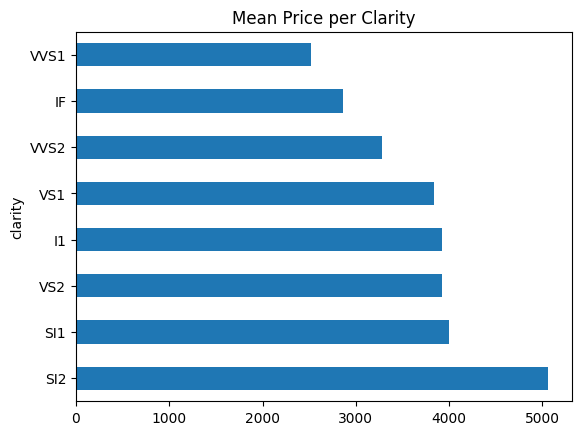

In [46]:
diamonds.groupby('clarity')['price'].agg('mean').sort_values(ascending=False).plot.barh()
plt.title('Mean Price per Clarity')

<Axes: ylabel='cut,clarity'>

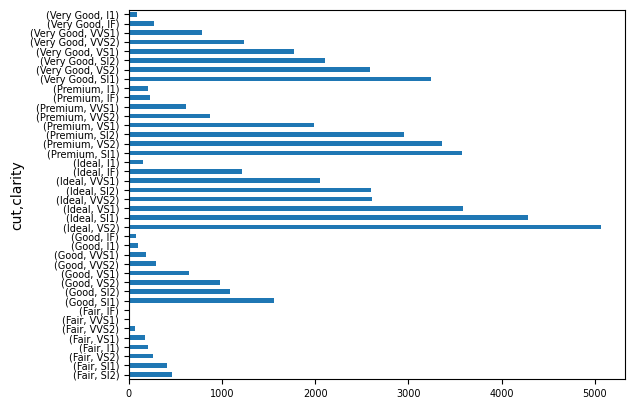

In [49]:
diamonds.groupby('cut')['clarity'].value_counts().plot.barh(fontsize=7)